# SciKit  -  Learn

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt

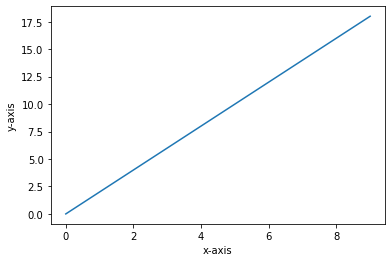

In [6]:
x = np.arange(10)

y = 2*x

plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.plot(x,y)


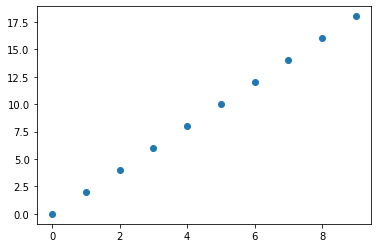

In [7]:
plt.scatter(x,y)

In [12]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [128]:
iris = datasets.load_iris()

#split it in features and labels
x = iris.data
y = iris.target

print(x)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [13]:
#hours of study vs good/bad grades
#10 students
#train with 8
#predict with the remaining 2
#levels of accuracy

x_train,x_test,y_train,y_test 
            = train_test_split(x,y,test_size = 0.2)


In [14]:
print('Train x:', x_train.shape)
print('Test x:', x_test.shape)
print('Train y:',y_train.shape)
print('Test y:', y_test.shape)

Train x: (120, 4)
Test x: (30, 4)
Train y: (120,)
Test y: (30,)


## KNN classifier (K Nearest Neighbours)

In [17]:
import numpy as np
import pandas as pd
from sklearn import neighbors, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [19]:
data = pd.read_csv('titanic.csv',header=0,index_col='PassengerId')

In [185]:
new_data = data.dropna(subset = ['Age'])
#new_data[:10]


In [144]:
#Attributes
x = new_data[[
    'Pclass',
    'Sex',
    'Age'
]].values

#Label
y = new_data[['Survived']]
y =  np.squeeze(np.asarray(y)) #into an array

#converting the data 
Le = LabelEncoder()
x[:,1] = Le.fit_transform(x[:,1])

print(x[:20])


[[3 1 22.0]
 [1 0 38.0]
 [3 0 26.0]
 [1 0 35.0]
 [3 1 35.0]
 [1 1 54.0]
 [3 1 2.0]
 [3 0 27.0]
 [2 0 14.0]
 [3 0 4.0]
 [1 0 58.0]
 [3 1 20.0]
 [3 1 39.0]
 [3 0 14.0]
 [2 0 55.0]
 [3 1 2.0]
 [3 0 31.0]
 [2 1 35.0]
 [2 1 34.0]
 [3 0 15.0]]


In [180]:
#create model for predictions

knn = neighbors.KNeighborsClassifier(n_neighbors = 12, weights = 'distance')

# seperating data for train and test
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [181]:
#training our model
knn.fit(x_train,y_train)

#making prediction
prediction = knn.predict(x_test)

#accuracy of the model
accuracy = metrics.accuracy_score(y_test, prediction)

In [182]:
print('Predictions: ', prediction)
print('Accuracy: ', accuracy)

Predictions:  [1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1
 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0]
Accuracy:  0.7902097902097902


In [183]:
# We are checking by ourselves
index = 155
print('Actual value: ',y[index])
print('Predicted:',knn.predict(x[index:index+1]))

Actual value:  1
Predicted: [1]


##  

##  

# Support Vector Machine

1.) Effective in high dimensional spaces

2.) Many kernel functions
- linear
- polynomial function
- exponential function
- sigma function

3.) Classifical and regression

In [206]:
import numpy as np
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import svm


iris = datasets.load_iris()
#split it in features and labels
x = iris.data
y = iris.target

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

#Different classes
classes = ['Iris Setosa', 'Iris Versicolour', 'Iris Virginica']

#building a model
model = svm.SVC(gamma='auto')

#training the model
model.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [207]:
# Making predictions
predictions = model.predict(x_test)
accuracy = accuracy_score(y_test,predictions)

print('Predictions: ',predictions)
print('Actual val.: ',y_test)
print('Accuracy: ', accuracy)

Predictions:  [1 0 2 1 1 1 0 1 1 2 0 0 1 0 2 0 0 2 1 0 1 0 2 1 1 1 2 0 2 2]
Actual val.:  [1 0 2 1 1 1 0 1 1 2 0 0 1 0 2 0 0 2 1 0 1 0 2 1 1 1 2 0 2 2]
Accuracy:  1.0


In [209]:
for i,value in enumerate(predictions):
    print(classes[value])

Iris Versicolour
Iris Setosa
Iris Virginica
Iris Versicolour
Iris Versicolour
Iris Versicolour
Iris Setosa
Iris Versicolour
Iris Versicolour
Iris Virginica
Iris Setosa
Iris Setosa
Iris Versicolour
Iris Setosa
Iris Virginica
Iris Setosa
Iris Setosa
Iris Virginica
Iris Versicolour
Iris Setosa
Iris Versicolour
Iris Setosa
Iris Virginica
Iris Versicolour
Iris Versicolour
Iris Versicolour
Iris Virginica
Iris Setosa
Iris Virginica
Iris Virginica


In [210]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier

X = np.array([[1, 2], [3, 4], [5, 6],[7,8],[9,10],[11,12],[13,14]])
Y = np.array([0, 1, 0,1,1,0,1])
clf = DecisionTreeClassifier()
clf.fit(X, Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [213]:
print(clf.predict([[2,3],[2,2],[101,99]]))

[0 0 1]


In [215]:
importances = clf.feature_importances_
print(importances)

[0.44583333 0.55416667]


##  